# **Import Library**

In [25]:
!pip install google-play-scraper

In [26]:
!pip install pipreqs

In [27]:
# Mengimpor Pustaka google_play_scraper untuk Mengakses Ulasan dan Informasi Aplikasi dari Google Play Store
from google_play_scraper import app, Sort, reviews_all

Perintah yang telah dijalankan di atas akan mengunduh dan menginstal pustaka google_play_scraper serta dependensinya jika diperlukan. Setelah instalasi selesai, dapat dilanjutkan dengan mengimpor dan menggunakannya dalam notebook untuk mengambil data dari Play Store dan melanjutkan dengan analisis sentimen.

In [28]:
import pandas as pd # Manipulasi dan Analisis Data
pd.options.mode.chained_assignment = None # Menonaktifkan Peringatan Chaining
import numpy as np # Komputasi Numerik
seed = 0
np.random.seed(seed) # Mengatur Seed untuk Reproduktibilitas
import matplotlib.pyplot as plt # Visualisasi Data
import seaborn as sns # Visualisasi Data Statistik dan Mengatur Gaya Visualisasi

import datetime as dt # Manipulasi Data Waktu dan Tanggal
import re # Modul untuk Bekerja dengan Ekspresi Reguler
import string # Berisi Konstanta String, seperti Tanda Baca
from nltk.tokenize import word_tokenize # Tokenisasi Teks
from nltk.corpus import stopwords # Daftar Kata-Kata Berhenti dalam Teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory # Stemming/Penghilangan Imbuhan Kata dalam Bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory # Menghapus Kata-Kata Berhenti dalam Bahasa Indonesia

from wordcloud import WordCloud # Membuat Visualisasi Berbentuk Awan Kata (Word Cloud) dari Teks

In [29]:
import nltk # Import Pustaka NLTK (Natural Language Toolkit)
nltk.download("punkt") # Unduh Dataset yang Diperlukan untuk Tokenisasi Teks
nltk.download("stopwords") # Unduh Dataset yang Berisi Daftar Kata-Kata Berhenti (Stop Words) dalam Berbagai Bahasa

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # Konversi Teks ke Vektor
from nltk.util import ngrams # Mengambil N-gram dari Teks
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report

# **Scapping Dataset**

Pada proyek ini, akan dilakukan analisis sentimen terhadap ulasan dan pendapat pengguna terkait aplikasi "Candy Crush Soda Saga" di Play Store. Analisis sentimen akan membantu untuk memahami bagaimana pengguna merasakan dan mengungkapkan pandangan terhadap aplikasi tersebut.

Dengan menggunakan berbagai teknik pemrosesan teks dan algoritma machine learning, proyek ini akan mencoba mengidentifikasi apakah ulasan pengguna terhadap aplikasi "Candy Crush Soda Saga" cenderung positif, negatif, atau netral. Hasil analisis sentimen ini dapat memberikan wawasan berharga kepada pengembang aplikasi untuk meningkatkan pengalaman pengguna.

In [31]:
from google_play_scraper import reviews_all, Sort

# Mengambil Seluruh Ulasan dari Aplikasi dengan ID "com.king.candycrushsodasaga" di Google Play Store
all_reviews = []
count_per_iteration = 1000  # Jumlah Ulasan per Iterasi
num_iterations = 20  # Jumlah Iterasi Maksimum
target_reviews = 50000  # Jumlah Ulasan yang Diinginkan (50.000)

continuation_token = None  # Inisialisasi continuation_token

for i in range(num_iterations):
    result = reviews_all(
        "com.king.candycrushsodasaga", # ID Aplikasi
        sleep_milliseconds=500,  # Menambahkan Jeda Sebesar 0.5 detik untuk Menghindari Overload Server
        lang='id',  # Bahasa Ulasan (default: 'en')
        country='id',  # Negara (default: 'us')
        sort=Sort.MOST_RELEVANT,  # Urutan Ulasan (default: Sort.MOST_RELEVANT)
        count=count_per_iteration,
        continuation_token=continuation_token
    )

    # Mengakses "reviews" dan "continuation_token" dari Hasil Pustaka
    # reviews_all Mengembalikan List Pustaka Review dan Mendapatkan List dari Hasil
    reviews = result

    # Memeriksa Apakah Terdapat Ulasan yang Dikembalikan
    if reviews:
        # Mengambil continuationToken dari Ulasan Terakhir Jika Ada
        continuation_token = reviews[-1].get("continuationToken")
    else:
        # Jika Tidak Terdapat Ulasan maka Hentikan Iterasi
        continuation_token = None
        break  # Keluar dari Loop for

    all_reviews.extend(reviews)
    print(f"Iteration {i + 1}: Terkumpul {len(reviews)} reviews, total {len(all_reviews)}")  # Menampilkan Progres Scraping Ulasan

    # Memeriksa Apakah Jumlah Ulasan yang Diinginkan Telah Tercapai
    if len(all_reviews) >= target_reviews:
        print(f"Target ulasan telah tercapai sebanyak: {target_reviews} ulasan")
        break  # Keluar dari Loop for

Iteration 1: Terkumpul 90779 reviews, total 90779
Target ulasan telah tercapai sebanyak: 50000 ulasan


In [32]:
# Menyimpan Ulasan dalam File CSV
import csv

with open("Ulasan_CandyCrushSodaSaga.csv", mode="w", newline="", encoding="utf-8") as file:
  writer = csv.writer(file)
  writer.writerow(["Review"]) # Menulis Header Kolom
  for review in all_reviews:
    writer.writerow([review["content"]]) # Menulis Konten Ulasan ke dalam File CSV

print(f"Total ulasan yang terkumpul sebanyak: {len(all_reviews)}")

Total ulasan yang terkumpul sebanyak: 90779


# **Loading Dataset**

In [33]:
# Memuat DataFrame dari Hasil scrapreview
app_reviews_df = pd.read_csv("Ulasan_CandyCrushSodaSaga.csv")
app_reviews_df.to_csv("Ulasan_CandyCrushSodaSaga.csv", index=False)

# Menampilkan Lima  Baris Pertama DataFrame dan Menghitung Jumlah Baris serta Kolom DataFrame
print(app_reviews_df.head())
app_reviews_df.shape

                                              Review
0  Tolong ada pilihan untuk lagunya. Soalnya aku ...
1  backsound nya jadi jelek, Clasik nya berkurang...
2  Lama2 kesel jg, udh topup 1 jam yg lalu tp koi...
3  Parah.. 1 level butuh waktu lama.. Padahal mas...
4  Mantap game yg sangat menghibur dan tidak meny...


(90779, 1)

In [34]:
# Menampilkan Informasi tentang DataFrame app_reviews_df
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90779 entries, 0 to 90778
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  90691 non-null  object
dtypes: object(1)
memory usage: 709.3+ KB


In [35]:
# Membuat DataFrame Baru (clean_df) dengan Menghapus Baris yang Memiliki Nilai yang Hilang (NaN) dari app_reviews_df
clean_df = app_reviews_df.dropna()

In [36]:
# Menampilkan Informasi tentang DataFrame clean_df Setelah Membersihkan Nilai yang Hilang (NaN)
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90691 entries, 0 to 90707
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  90691 non-null  object
dtypes: object(1)
memory usage: 1.4+ MB


In [37]:
# Menghapus Baris Duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()

# Menghitung Jumlah Baris dan Kolom dalam DataFrame clean_df Setelah Menghapus Duplikat
jumlah_baris_ulasan_setelah_hapus, jumlah_kolom_setelah_hapus = clean_df.shape
print(f"Jumlah baris ulasan setelah menghapus duplikat: {jumlah_baris_ulasan_setelah_hapus}")
print(f"Jumlah kolom ulasan setelah menghapus duplikat: {jumlah_kolom_setelah_hapus}")

Jumlah baris ulasan setelah menghapus duplikat: 54718
Jumlah kolom ulasan setelah menghapus duplikat: 1


In [38]:
# Menampilkan Informasi tentang DataFrame clean_df Setelah Menghapus Duplikat
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54718 entries, 0 to 90707
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  54718 non-null  object
dtypes: object(1)
memory usage: 855.0+ KB


# **Preprocessing**

Berikut adalah beberapa fungsi yang digunakan untuk membersihkan dan memproses teks. Berikut merupakan penjelasan singkat mengenai masing-masing fungsi:
1. **cleaningText(text)**: Membersihkan teks dengan beberapa langkah seperti menghapus mention, hashtag, RT(retweet), tautan(link), angka, dan tanda baca. Selain itu, juga menggantikan karakter newline dengan spasi dan menghilangkan spasi ekstra di awal dan akhir teks.
2. **casefoldingText(text)**: Mengonversi semua karakter dalam teks menjadi huruf kecil (lowercase) sehingga teks menjadi lebih seragam.
3. **tokenizingText(text)**: Membagi teks menjadi daftar kata atau token. Berguna untuk mengurai teks menjadi komponen-komponen dasar.
4. **filteringText(text)**: Menghapus kata-kata berhenti (stopwords) dalam teks. Memperbarui daftar kata-kata berhenti dengan beberapa kata tambahan.
5. **stemmingText(text)**: Menerapkan stemming pada teks, yaitu mengurangi kata-kata menjadi bentuk dasarnya. Menggunakan pustaka Sastrawi untuk melakukan stemming dalam bahasa Indonesia.
6. **toSentence(list_words)**: Menggabungkan daftar kata-kata menjadi sebuah kalimat.


Dapat menggunakan fungsi-fungsi di atas dalam proyek ini untuk membersihkan, memproses, dan mempersiapkan teks sebelum melakukan analisis sentimen.

In [39]:
def cleaningText(text):
  text = re.sub(r"@[A-Za-z0-9]+", "", text) # Menghapus Mentions
  text = re.sub(r"#[A-Za-z0-9]+", "", text) # Menghapus Hashtag
  text = re.sub(r"RT[\s]", "", text) # Menghapus RT
  text = re.sub(r"http\S+", "", text) # Menghapus Link
  text = re.sub(r"[0-9]+", "", text) # Menghapus Angka
  text = re.sub(r"[^\w\s]", "", text) # Menghapus Karakter selain Huruf dan Angka

  text = text.replace("\n", " ") # Mengganti Baris Baru menjadi Spasi
  text = text.translate(str.maketrans("", "", string.punctuation)) # Menghapus Seluruh Tanda Baca
  text = text.strip(" ") # Menghapus Karakter Spasi dari Kanan dan Kiri Teks
  return text

def casefoldingText(text): # Mengkonversi Seluruh Karakter Teks Menjadi Huruf Kecil
  text = text.lower()
  return text

def tokenizingText(text): # Memecah atau Membagi String, Teks Menjadi Daftar Token
  text = word_tokenize(text)

def filteringText(text): # Menghapus stopwords dalam Teks
  listStopwords = set(stopwords.words("indonesian"))
  listStopwords1 = set(stopwords.words("english"))
  listStopwords.update(listStopwords1)
  listStopwords.update(["iya", "yaa", "gak", "nya", "na", "sih", "ku", "di", "ga", "ya", "gaa", "loh", "kah", "woi", "woii", "woy"])
  filtered = []
  for txt in text:
    if txt not in listStopwords:
      filtered.append(txt)
  text = filtered
  return text

def stemmingText(text): # Mengurangi Kata Menjadi ke Bentuk Dasarnya yang Menghilangkan Imbuhan Awalan dan Akhiran atau ke Akar Kata
  # Membuat Objek Stemmer
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  # Memecah Teks menjadi Daftar Kata
  words = text.split()

  # Menerapkan Stemming pada Setiap Kata dalam Daftar
  stemmed_words = [stemmer.stem(word) for word in words]

  # Menggabungkan Kata-Kata yang Telah Distem
  stemmed_text = " ".join(stemmed_words)

  return stemmed_text

  return stemmed_test
def toSentence(list_words): # Mengkonversi Daftar Kata menjadi Kalimat
  sentence = " ".join(word for word in list_words)
  return sentence

In [40]:
slangwords = {
    "@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing","anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng",  "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin", "jd": "jadi", "blm": "belum", "jgn": "jangan", "tp": "tapi", "hp": "handphone", "mala": "malah", "tpi": "tapi", "ga": "tidak", "JD": "jadi", "tolol": "bodoh", "keluarr": "keluar", "donk": "dong", "engga": "tidak", "ga": "tidak", "gak": "tidak", "ngga": "tidak", "nggak": "tidak", "acount": "akun", "marn": "main", "gamau": "tidak mau", "aja": "saja", "paraaaaaahah-hhhhh": "parah", "udh": "sudah", "jg": "juga", "bgt": "sekali", "mantul": "mantap betul", "parah": "sangat buruk", "nyebelin": "menjengkelkan", "ngeselin": "menjengkelkan", "lemot": "lambat", "ngadat": "macet", "cape/capek": "capai", "ajaib": "aneh", "ngulang": "mengulang", "auto": "langsung", "sumpah": "sungguh", "sampe": "sampai", "kecewa": "tidak puas", "seru": "menyenangkan", "gila": "hebat/luar biasa", "nagih": "membuat ketagihan", "mantap": "bagus", "abis": "habis", "mulu": "terus-menerus", "niat": "serius", "koin": "mata uang permainan", "Lama2": "lama-lama", "mantaappp": "mantap"
}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = " ".join(fixed_words)
    return fixed_text

Kamus slang atau daftar kata-kata slang yang diberikan adalah kumpulan kata-kata slang bahasa Indonesia beserta terjemahan atau artinya dalam bahasa formal. Fungsi dari kamus slang seperti ini adalah:
1. **Mengartikan Slang**: Membantu orang yang mungkin tidak familiar dengan bahasa slang atau ekspreksi yang digunakan di kalangan tertentu untuk memahami makna kata-kata tersebut.
2. **Komunikasi Informal**: Slang sering digunakan dalam percakapan informal atau di media sosial. Membantu orang untuk berkomunikasi dengan gaya yang lebih santai dan sesuai dengan konteksnya.
3. **Pemahaman Budaya Pop**: Slang sering kali terkait dengan budaya pop dan dapat mencerminkan tren dan perubahan dalam bahasa. Memungkinkan orang untuk mengikuti dan memahami bahasa dalam konteks budaya ini.
4. **Penggunaan Sastra dan Penulisan**: Penulis atau pembicara mungkin bisa menggunakan slang dalam tulisannya untuk menciptakan efek tertentu atau mengekspresikan karakter atau setting yang lebih realistis. Membantu memilih kata-kata dengan tepat.
5. **Hiburan dan Curiositas**: Beberapa orang mungkin tertarik untuk mempelajari bahasa slang hanya untuk hiburan atau karena rasa ingin tahu terhadap variasi bahasa dan ungkapan dalam bahasa sehari-hari.

Penggunaan slang harus disesuaikan dengan konteks dan audiens. Slang cenderung lebih cocok untuk percakapan santai dengan teman-teman atau di lingkungan yang informal. Dalam situasi formal, penggunaan bahasa formal lebih sesuai.

In [41]:
clean_df

,Review
0,Tolong ada pilihan untuk lagunya. Soalnya aku ...
1,"backsound nya jadi jelek, Clasik nya berkurang..."
2,"Lama2 kesel jg, udh topup 1 jam yg lalu tp koi..."
3,Parah.. 1 level butuh waktu lama.. Padahal mas...
4,Mantap game yg sangat menghibur dan tidak meny...
...,...
90698,🐈🐈🐈🐈🐈🐈🐈🦍
90699,J.
90700,Mantaappp...???
90706,Gimana....????


In [42]:
import nltk

# Sebelum Menggunakan tokenize_text atau tokenize_sent, Diperlukan Download Sumber "punkt_tab"
nltk.download('punkt_tab')

def tokenizingText(text):
  return word_tokenize(text)

# Membersihkan Teks dan Menyimpannya di Kolom "text_clean"
clean_df["text_clean"] = clean_df["Review"].apply(cleaningText)

# Mengubah Huruf dalam Teks Menjadi Huruf Kecil dan Menyimpannya di "text_casefoldingText"
clean_df["text_casefoldingText"] = clean_df["text_clean"].apply(casefoldingText)

# Mengganti Kata-Kata Slang dengan Kata-Kata Standar dan Menyimpannya di "text_slangwords"
clean_df["text_slangwords"] = clean_df["text_casefoldingText"].apply(fix_slangwords)

# Memecah Teks Menjadi Token (Kata-Kata) dan Menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus Kata-Kata Stop (Kata-Kata Umum) dan Menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan Token-Token menjadi Kalimat dan Menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [43]:
clean_df

,Review,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,Tolong ada pilihan untuk lagunya. Soalnya aku ...,Tolong ada pilihan untuk lagunya Soalnya aku s...,tolong ada pilihan untuk lagunya soalnya aku s...,tolong ada pilihan untuk lagunya soalnya aku s...,"[tolong, ada, pilihan, untuk, lagunya, soalnya...","[tolong, pilihan, lagunya, suka, lagu, ceria, ...",tolong pilihan lagunya suka lagu ceria lagu an...
1,"backsound nya jadi jelek, Clasik nya berkurang...",backsound nya jadi jelek Clasik nya berkurangt...,backsound nya jadi jelek clasik nya berkurangt...,backsound nya jadi jelek clasik nya berkurangt...,"[backsound, nya, jadi, jelek, clasik, nya, ber...","[backsound, jelek, clasik, berkurangtolong, ke...",backsound jelek clasik berkurangtolong kembali...
2,"Lama2 kesel jg, udh topup 1 jam yg lalu tp koi...",Lama kesel jg udh topup jam yg lalu tp koin e...,lama kesel jg udh topup jam yg lalu tp koin e...,lama kesel juga sudah topup jam yang lalu tapi...,"[lama, kesel, juga, sudah, topup, jam, yang, l...","[kesel, topup, jam, mata, uang, permainan, ema...",kesel topup jam mata uang permainan emas masuk...
3,Parah.. 1 level butuh waktu lama.. Padahal mas...,Parah level butuh waktu lama Padahal masih lv...,parah level butuh waktu lama padahal masih lv...,sangat buruk level butuh waktu lama padahal ma...,"[sangat, buruk, level, butuh, waktu, lama, pad...","[buruk, level, butuh, lv, bantuan, logis, x, m...",buruk level butuh lv bantuan logis x menang x ...
4,Mantap game yg sangat menghibur dan tidak meny...,Mantap game yg sangat menghibur dan tidak meny...,mantap game yg sangat menghibur dan tidak meny...,bagus game yang sangat menghibur dan tidak men...,"[bagus, game, yang, sangat, menghibur, dan, ti...","[bagus, game, menghibur, menyebalkan, game, sa...",bagus game menghibur menyebalkan game sarat ik...
...,...,...,...,...,...,...,...
90698,🐈🐈🐈🐈🐈🐈🐈🦍,,,,[],[],
90699,J.,J,j,j,[j],[j],j
90700,Mantaappp...???,Mantaappp,mantaappp,mantap,[mantap],[mantap],mantap
90706,Gimana....????,Gimana,gimana,bagaimana,[bagaimana],[],


# **Pelabelan**

In [44]:
import csv
import requests
from io import StringIO

# Membaca Data Kamus Kata-Kata Positif dari Github
lexicon_positive = dict()

response = requests.get("https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv")
# Mengirim Permintaan HTTP untuk Mendapatkan File CSV dari Github

if response.status_code == 200:
  # Jika Permintaan Berhasil
  reader = csv.reader(StringIO(response.text), delimiter=",")
  # Membaca Teks Respons sebagai File CSV Menggunakan Pembaca CSV dengan Pemisah Koma

  for row in reader:
    # Mengulangi Setiap Baris dalam File CSV
    lexicon_positive[row[0]] = int(row[1])
    # Menambahkan Kata-Kata Positif dan Skornya ke Dalam Kamus lexicon_positive
else:
  print("Gagal dalam Mengambil Data Lexicon Positif")

In [45]:
# Membaca Data Kamus Kata-Kata Negatif dari Github
lexicon_negative = dict()

response = requests.get("https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv")
# Mengirim Permintaan HTTP untuk Mendapatkan File CSV dari Github

if response.status_code == 200:
  # Jika Permintaan Berhasil
  reader = csv.reader(StringIO(response.text), delimiter=",")
  # Membaca Teks Respons sebagai File CSV Menggunakan Pembaca CSV dengan Pemisah Koma

  for row in reader:
    # Mengulangi Setiap Baris dalam File CSV
    lexicon_negative[row[0]] = int(row[1])
    # Menambahkan Kata-Kata Negatif dan Skornya dalam Kamus lexicon_negative
else:
  print("Gagal dalam Mengambil Data Lexicon Negatif")

In [46]:
# Fungsi untuk Menentukan Polaritas Sentimen dari Tweet
def sentiment_analysis_lexicon_indonesia(text):
  # For Word in Text:

  score = 0
  # Inisialisasi Skor Sentimen ke 0

  for word in text:
    # Mengulangi Setiap Kata dalam Teks

    if (word in lexicon_positive):
      score = score + lexicon_positive[word]
      # Jika Kata Terdapat di Dalam Kamus Positif, Tambahkan Skornya ke Skor Sentimen

  for word in text:
    # Mengulangi Setiap Kata dalam Teks (Sekali Lagi)

    if (word in lexicon_negative):
      score = score + lexicon_negative[word]
      # Jika Kata Terdapat di Dalam Kamus Negatif, Kurangkan Skornya dari Skor Sentimen

  polarity = ""
  # Inisialisasi Variabel Polaritas

  if (score > 0):
    polarity = "Positif"
    # Jika Skor Sentimen Lebih Besar atau Sama Dengan 0, maka Polaritas adalah Positif
  elif (score < 0):
    polarity = "Negatif"
    # Jika Skor Sentimen Kurang dari 0, maka Polaritas adalah Negatif

  else:
     polarity = "Netral"
     # Ini adalah Bagian yang Dapat Digunakan untuk Menentukan Polaritas Netral Jika Diperlukan
     # Skor 0 Dianggap Netral

  return score, polarity
  # Mengembalikan Skor Sentimen dan Polaritas Teks

In [47]:
results = clean_df["text_stopword"].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df["polarity_score"] = results[0]
clean_df["polarity"] = results[1]
print(clean_df["polarity"].value_counts())

polarity
Positif    20911
Netral     19196
Negatif    14611
Name: count, dtype: int64


Berdasarkan hasil polarity yang dihasilkan, ulasan Positif memiliki 20911 data, ulasan Netral memiliki 19196 data, dan ulasan Negatif memiliki 14611 data sehingga dapat disimpulkan bahwa aplikasi Candy Crush Soda Saga cenderung memiliki ulasan yang baik.

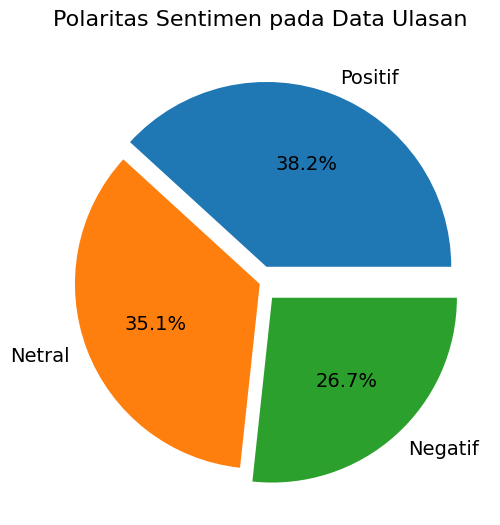

In [48]:
# Membuat Objek Gambar dan Sumbu dengan Ukuran (8, 6) inci
fig, ax = plt.subplots(figsize=(8, 6))

# Mengambil Jumlah Data Polaritas Sentimen dari DataFrame "clean_df" dan Menyimpan dalam list "sizes"
sizes = [count for count in clean_df["polarity"].value_counts()]

# Mengambil Label atau Kategori Sentimen dari DataFrame "clean_df" dan Menyimpannya dalam list "labels"
labels = list(clean_df["polarity"].value_counts().index)

# Menentukan Seberapa Jauh Potongan dari Pie Chart akan Ditarik (0.1 artinya Potongan Pertama akan Sedikit Terpisah)
explode = (0.1, 0, 0.1)

# Membuat Pie Chart dengan Data "sizes", "labels", dan "explode" yang Telah Ditentukan
# Autopct Digunakan untuk Menampilkan Persentase di Dalam Setiap Potongan Pie
# Textprops Digunakan untuk Mengatur Ukuran Font Teks dalam Pie Chart
ax.pie(x=sizes, labels=labels, autopct="%1.1f%%", explode=explode, textprops={"fontsize": 14})

# Menetapkan Judul untuk Pie Chart dengan Ukuran Font dan Jarak (Padding tertentu)
ax.set_title("Polaritas Sentimen pada Data Ulasan", fontsize=16, pad=20)

# Menampilkan Pie Chart
plt.show()

### Positif

In [49]:
# Mengatur Opsi Tampilan Pandas supaya Kolom Dapat Menampilkan Teks Hingga 3000 karakter
pd.set_option("display.max_colwidth", 3000)

# Membuat DataFrame Baru "positive_tweets" yang Hanya Berisi tweet dengan Polaritas Positif
positive_tweets = clean_df[clean_df["polarity"] == "positive"]

# Memilih Hanya Kolom-Kolom Tertentu dari DataFrame "positive_tweets"
positive_tweets = positive_tweets[["text_akhir", "polarity_score", "polarity", "text_stopword"]]

# Mengurutkan DataFrame "positive_tweets" Berdasarkan "polarity_score" secara Menurun
positive_tweets = positive_tweets.sort_values(by="polarity_score", ascending=False)

# Mengatur Ulang Indeks DataFrame supaya Dimulai dari 0
positive_tweets = positive_tweets.reset_index(drop=True)

# Menambahkan 1 ke Seluruh Indeks DataFrame
positive_tweets.index += 1

###  Netral

In [50]:
# Mengatur Opsi Tampilan Pandas supaya Kolom Dapat Menampilkan Teks Hingga 3000 karakter
pd.set_option("display.max_colwidth", 3000)

# Membuat DataFrame Baru "neutral_tweets" yang Hanya Berisi tweet dengan Polaritas Netral
neutral_tweets = clean_df[clean_df["polarity"] == "neutral"]

# Memilih Hanya Kolom-Kolom Tertentu dari DataFrame "neutral_tweets"
neutral_tweets = neutral_tweets[["text_akhir", "polarity_score", "polarity", "text_stopword"]]

# Mengurutkan DataFrame "neutral_tweets" Berdasarkan "polarity_score"
neutral_tweets = neutral_tweets.sort_values(by="polarity_score", ascending=False)

# Mengatur Ulang Indeks DataFrame supaya Dimulai dari 0
neutral_tweets = neutral_tweets.reset_index(drop=True)

# Menambahkan 1 ke Seluruh Indeks DataFrame
neutral_tweets.index += 1

### Negatif

In [51]:
# Mengatur Opsi Tampilan Pandas supaya Kolom Dapat Menampilkan Teks Hingga 3000 karakter
pd.set_option("display.max_colwidth", 3000)

# Membuat DataFrame Baru "negative_tweets" yang Hanya Berisi tweet dengan Polaritas Negatif
negative_tweets = clean_df[clean_df["polarity"] == "negative"]

# Memilih Hanya Kolom-Kolom Tertentu dari DataFrame "negative_tweets"
negative_tweets = negative_tweets[["text_akhir", "polarity_score", "polarity", "text_stopword"]]

# Mengurutkan DataFrame "negative_tweets" Berdasarkan "polarity_score" secara Menaik (Ascending)
negative_tweets = negative_tweets.sort_values(by="polarity_score", ascending=False)

# Memilih 10 Baris Pertama dari DataFrame yang Sudah Diurutkan
negative_tweets = negative_tweets[0:10]

# Mengatur Ulang Indeks DataFrame supaya Dimulai dari 0
negative_tweets = negative_tweets.reset_index(drop=True)

# Menambahkan 1 ke Seluruh Indeks DataFrame
negative_tweets.index += 1

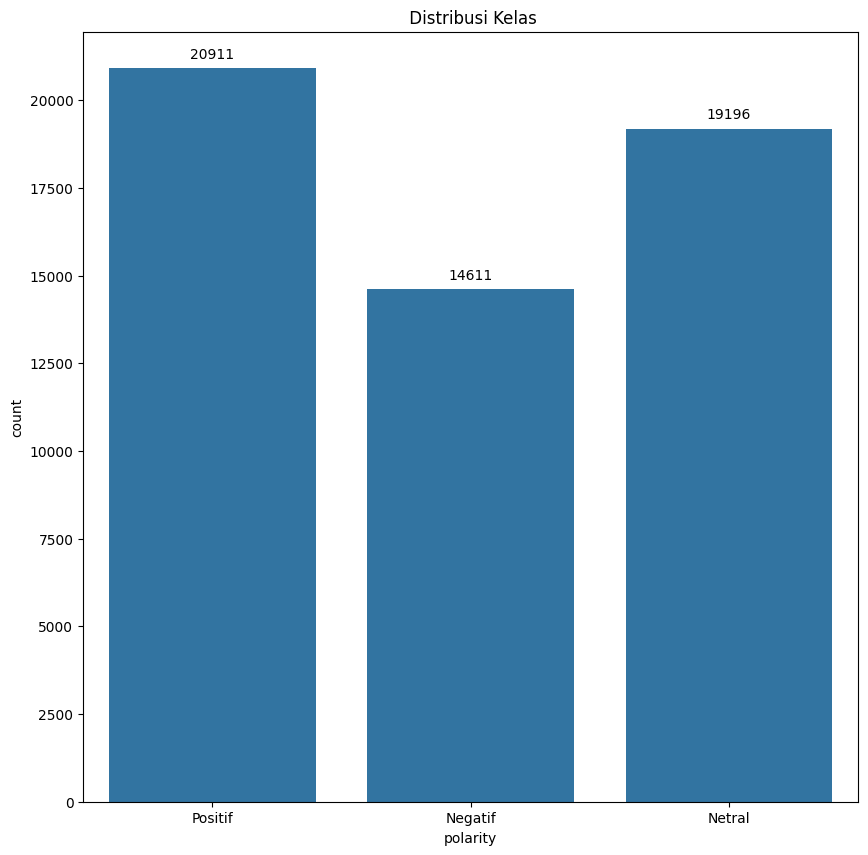

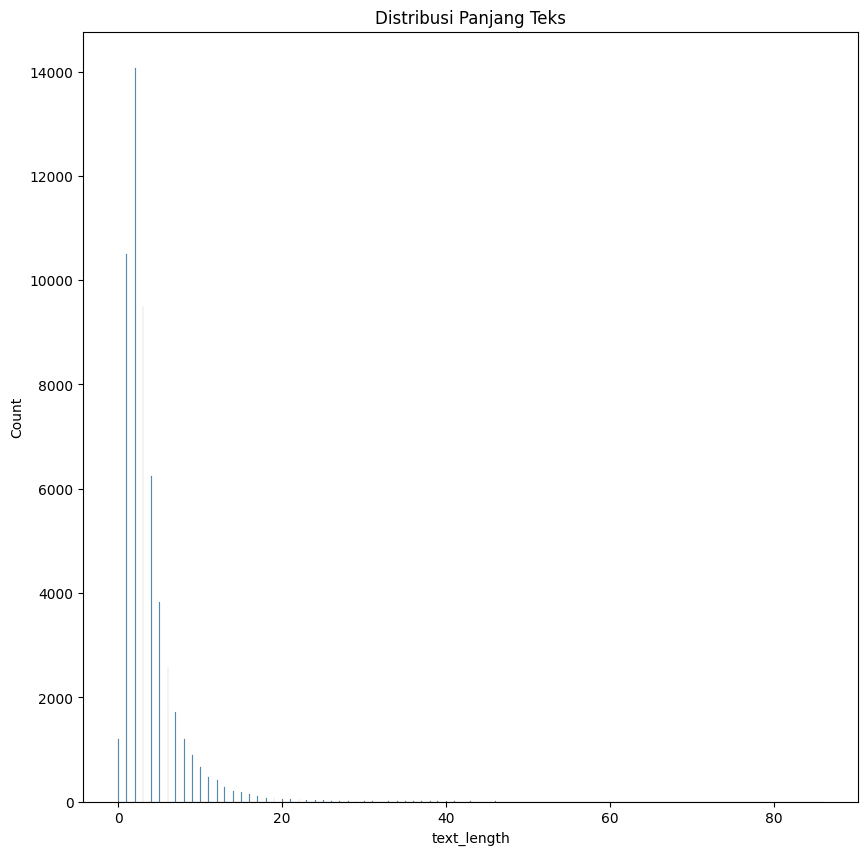

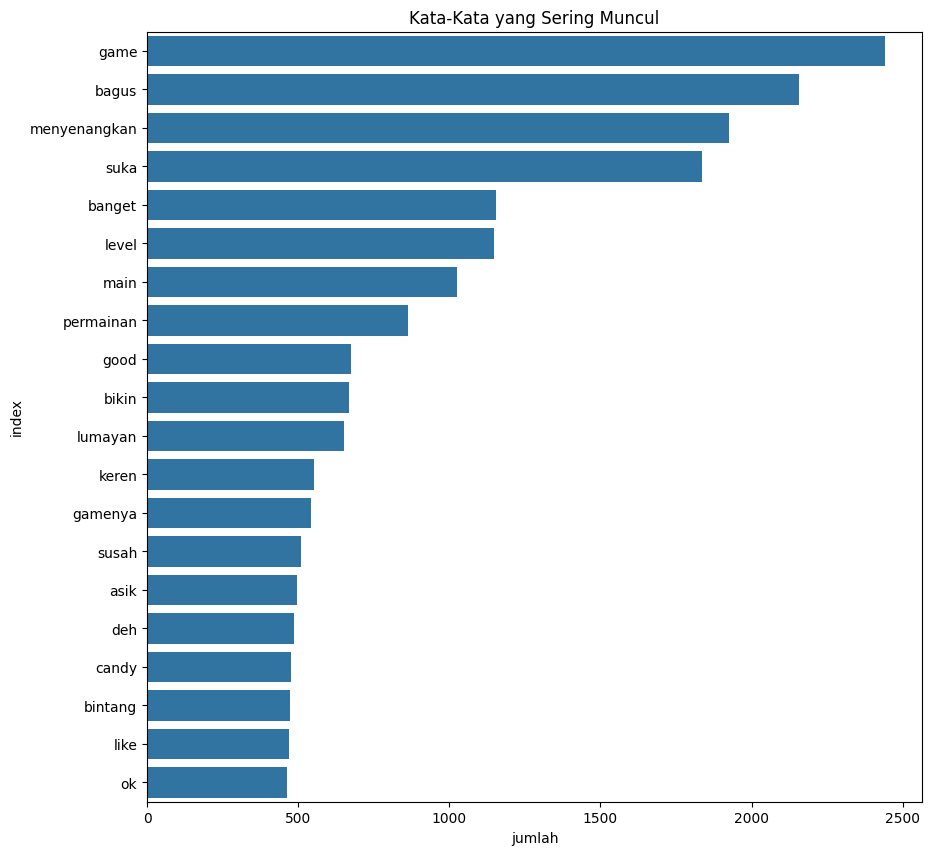

In [52]:
# Mengeset Ukuran Figur
plt.figure(figsize=(10, 10))

# Memeriksa Distribusi Kelas
class_dist_plot = sns.countplot(x="polarity", data=clean_df)
plt.title(" Distribusi Kelas")

# Menambahkan Jumlah Angka di atas Bar pada Plot
for p in class_dist_plot.patches:
  class_dist_plot.annotate(format(p.get_height(), ".0f"),
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha = "center", va="center",
                           xytext=(0, 10),
                           textcoords="offset points")
plt.show()

# Mengeset Ukuran Figur
plt.figure(figsize=(10, 10))

# Visualisasi Distribusi Panjang Teks
clean_df["text_length"] = clean_df["text_akhir"].apply(lambda x: len(x.split()))
sns.histplot(clean_df["text_length"])
plt.title("Distribusi Panjang Teks")
plt.show()

# Mengeset Ukuran Figur
plt.figure(figsize=(10, 10))

# Visualisasi Kata-Kata yang Sering Muncul
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df["text_akhir"])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name="jumlah")
tfidf_df = tfidf_df.sort_values("jumlah", ascending=False).head(20)
sns.barplot(x="jumlah", y="index", data=tfidf_df)
plt.title("Kata-Kata yang Sering Muncul")
plt.show()

Penggunaan kata terbanyak pada ulasan aplikasi Candy Crush Soda Saga terdapat pada kata game, diikuti dengan bagus dan menyenangkan. Kata-kata tersebut juga dapat terindikasi sebagai ulasan positif pada pengguna aplikasi tersebut.

# **Data Splitting**

In [53]:
clean_df.head(2)

,Review,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity,text_length
0,"Tolong ada pilihan untuk lagunya. Soalnya aku sangat suka lagu yang dulu sangat ceria. Lagu sekarang sangat aneh didengar, sangat mengganggu, membuat tidak semangat mainnya.",Tolong ada pilihan untuk lagunya Soalnya aku sangat suka lagu yang dulu sangat ceria Lagu sekarang sangat aneh didengar sangat mengganggu membuat tidak semangat mainnya,tolong ada pilihan untuk lagunya soalnya aku sangat suka lagu yang dulu sangat ceria lagu sekarang sangat aneh didengar sangat mengganggu membuat tidak semangat mainnya,tolong ada pilihan untuk lagunya soalnya aku sangat suka lagu yang dulu sangat ceria lagu sekarang sangat aneh didengar sangat mengganggu membuat tidak semangat mainnya,"[tolong, ada, pilihan, untuk, lagunya, soalnya, aku, sangat, suka, lagu, yang, dulu, sangat, ceria, lagu, sekarang, sangat, aneh, didengar, sangat, mengganggu, membuat, tidak, semangat, mainnya]","[tolong, pilihan, lagunya, suka, lagu, ceria, lagu, aneh, didengar, mengganggu, semangat, mainnya]",tolong pilihan lagunya suka lagu ceria lagu aneh didengar mengganggu semangat mainnya,18,Positif,12
1,"backsound nya jadi jelek, Clasik nya berkurang,tolong kembalikan backsound yang lama karna ga sesuai dengan permainan nya",backsound nya jadi jelek Clasik nya berkurangtolong kembalikan backsound yang lama karna ga sesuai dengan permainan nya,backsound nya jadi jelek clasik nya berkurangtolong kembalikan backsound yang lama karna ga sesuai dengan permainan nya,backsound nya jadi jelek clasik nya berkurangtolong kembalikan backsound yang lama karena tidak sesuai dengan permainan nya,"[backsound, nya, jadi, jelek, clasik, nya, berkurangtolong, kembalikan, backsound, yang, lama, karena, tidak, sesuai, dengan, permainan, nya]","[backsound, jelek, clasik, berkurangtolong, kembalikan, backsound, sesuai, permainan]",backsound jelek clasik berkurangtolong kembalikan backsound sesuai permainan,-2,Negatif,8


In [54]:
# Memisahkan Data Menjadi Fitur (tweet) dan Label (sentimen)
X = clean_df["text_akhir"]
y = clean_df["polarity"]

In [55]:
# Mengekstraksi Fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)

In [56]:
# Mengkonversi Hasil Ekstraksi Fitur Menjadi DataFrame
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan Hasil Ekstraksi Fitur
features_df

,ah,anak,aplikasi,asik,asyik,ayo,bagus,bahagia,banget,bantuan,...,tolong,top,trus,uang,uda,ulang,update,upgrade,wktu,yah
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.609336,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.211799,0.0,0.0,0.571014,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.387748,0.0,0.0,0.0,0.000000,0.0,0.0,0.45234,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.171133,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54713,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
54714,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
54715,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
54716,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# Membagi Data Menjadi Data Latih dan Data Uji
# Membagi Data dengan 90:10
X_train_90, X_test_10, y_train_90, y_test_10 = train_test_split(X_tfidf, y, test_size=0.1, random_state=42)

# Membagi Data dengan 70:30
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)

# Membagi Data dengan 80:20
X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

Pada tahap data splitting ini, akan dilakukan 3 kombinasi ukuran pembagian data, yaitu 90:10, 70:30, dan 80:20.

# **Modeling**

Pada tahap pemodelan data, akan digunakan 3 jenis algoritma serta 3 kombinasi pembagian data, yaitu LightGBM dengan 80:20, Logistic Regression dengan 70:30, dan Random Forest dengan 90:10.

### LightGBM 80:20

In [58]:
!pip install lightgbm
import lightgbm as lgb

# Inisialisasi Model LightGBM
lgbm = lgb.LGBMClassifier(
    objective="multiclass",
    num_class=3,  # Jumlah Kelas Multiclass
    boosting_type="gbdt",  # Jenis Boosting
    num_leaves=31,  # Jumlah Daun dalam Setiap Pohon
    learning_rate=0.1,  # Learning Rate
    n_estimators=100,  # Jumlah Pohon
    random_state=42  # Seed untuk Reproduktibilitas
)

# Melatih Model LightGBM pada Data Pelatihan
lgbm.fit(X_train_80.toarray(), y_train_80)

# Memprediksi Sentimen pada Data Pelatihan dan Data Uji
y_pred_train_lgbm = lgbm.predict(X_train_80.toarray())
y_pred_test_lgbm = lgbm.predict(X_test_20.toarray())

# Evaluasi Akurasi Model LightGBM
accuracy_train_lgbm = accuracy_score(y_train_80, y_pred_train_lgbm)
accuracy_test_lgbm = accuracy_score(y_test_20, y_pred_test_lgbm)

# Menampilkan Akurasi
print("Akurasi Data Latih LightGBM Sebesar:", accuracy_train_lgbm)
print("Akurasi Data Uji LightGBM Sebesar:", accuracy_test_lgbm)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16930
[LightGBM] [Info] Number of data points in the train set: 43774, number of used features: 200
[LightGBM] [Info] Start training from score -1.318939
[LightGBM] [Info] Start training from score -1.049816
[LightGBM] [Info] Start training from score -0.960821


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Akurasi Data Latih LightGBM Sebesar: 0.8734636999131905
Akurasi Data Uji LightGBM Sebesar: 0.8654057017543859


### Logistic Regression 70:30

In [59]:
from sklearn.linear_model import LogisticRegression

# Membuat Objek Model Logistic Regression
logistic_regression = LogisticRegression(random_state=42)

# Melatih Model Logistik Regression pada Data Pelatihan
logistic_regression.fit(X_train_70.toarray(), y_train_70)

# Memprediksi Sentimen pada Data Pelatihan dan Data Uji
y_pred_train_lr = logistic_regression.predict(X_train_70.toarray())
y_pred_test_lr = logistic_regression.predict(X_test_30.toarray())

# Evaluasi Akurasi Model Logistic Regression pada Data Pelatihan
accuracy_train_lr = accuracy_score(y_train_70, y_pred_train_lr)

# Evaluasi Akurasi Model Logistic Regression pada Data Uji
accuracy_test_lr = accuracy_score(y_test_30, y_pred_test_lr)

# Menampilkan Akurasi
print("Akurasi Data Latih Logistic Regression Sebesar:", accuracy_train_lr)
print("Akurasi Data Uji Logistic Regression Sebesar:", accuracy_test_lr)

Akurasi Data Latih Logistic Regression Sebesar: 0.8569787478460654
Akurasi Data Uji Logistic Regression Sebesar: 0.8569688109161794


### Random Forest 90:10

In [60]:
# Membuat Objek Model Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih Model Random Forest pada Data Pelatihan
random_forest.fit(X_train_90.toarray(), y_train_90)

# Prediksi Sentimen pada Data Pelatihan dan Data Uji
y_pred_train_rf = random_forest.predict(X_train_90.toarray())
y_pred_test_rf = random_forest.predict(X_test_10.toarray())

# Evaluasi Akurasi Model Random Forest
accuracy_train_rf = accuracy_score(y_train_90, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test_10, y_pred_test_rf)

# Menampilkan Akurasi
print("Akurasi Data Latih Random Forest Sebesar:", accuracy_train_rf)
print("Akurasi Data Uji Random Forest Sebesar:", accuracy_test_rf)

Akurasi Data Latih Random Forest Sebesar: 0.9158713398042481
Akurasi Data Uji Random Forest Sebesar: 0.858735380116959


In [61]:
# Membuat DataFrame untuk Hasil Akurasi
results_df = pd.DataFrame({
    "Model": ["LightGBM", "Logistic Regression", "Random Forest"],
    "Akurasi Data Latih": [accuracy_train_lgbm, accuracy_train_lr, accuracy_train_rf],
    "Akurasi Data Uji" : [accuracy_test_lgbm, accuracy_test_lr, accuracy_test_rf]
})
# Menampilkan Hanya Kolom "Akurasi Data Uji"
only_accuracy_test = results_df[["Model", "Akurasi Data Uji"]]
print(only_accuracy_test)

                 Model  Akurasi Data Uji
0             LightGBM          0.865406
1  Logistic Regression          0.856969
2        Random Forest          0.858735


In [62]:
# Mengurutkan DataFrame Berdasarkan Kolom "Akurasi Data Uji" dari Tertinggi ke Terendah
sorted_accuracy_test = only_accuracy_test.sort_values(by="Akurasi Data Uji", ascending=False)

# Menampilkan DataFrame yang Telah Diurutkan
print(sorted_accuracy_test)

                 Model  Akurasi Data Uji
0             LightGBM          0.865406
2        Random Forest          0.858735
1  Logistic Regression          0.856969


Dalam kasus analisis sentimen ini, algoritma LightGBM mencapai akurasi sebesar 86.54% di mana merupakan akurasi tertinggi di antara ketiga kombinasi pemodelan yang digunakan. Oleh karena itu, algoritma LightGBM dipilih sebagai model utama yang akan digunakan dalam memprediksi sentimen pada kalimat-kalimat baru.

# **Menguji Kalimat Baru**

In [63]:
# Menginput Kalimat Baru dari Pengguna
kalimat_baru = input("Masukkan Kalimat Baru: ")

# Melakukan Preprocessing pada Kalimat Baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Menggunakan Objek tfidf yang Sudah Difit dari Pelatihan Sebelumnya
X_kalimat_baru = tfidf.transform([kalimat_baru_final])

# Memperoleh Prediksi Sentimen Kalimat Baru
sentimen_prediksi = lgbm.predict(X_kalimat_baru)

# Memperoleh Hasil Prediksi
if sentimen_prediksi[0] == "positive":
  print("Sentimen dari Kalimat Baru adalah POSITIF")
elif sentimen_prediksi[0] == "negative":
  print("Sentimen dari Kalimat Baru adalah NEGATIF")
else:
  print("Sentimen dari Kalimat Baru adalah NETRAL")

Masukkan Kalimat Baru: game ini seru
Sentimen dari Kalimat Baru adalah NETRAL


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
